# Compiled Code


In [13]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('/Users/acannon/Dropbox')
import seaborn as sns
sns.set_theme()
sns.set_palette('colorblind')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler 

## Pillar 1

## Pillar 2 - Retail Sentiment

Creating the data points for the google trends data. I standardise the data in STATA, and conduct the PCA to get the rotations.
This is hard coded, and i do not know how to save the rotations as a string or something (need to fix)

In [2]:

std = pd.read_excel('diss_data/std_gt.xlsx')
std_rot = [-0.0268,0.4361,0.2970,0.4448,0.1754,0.0226,-0.0843,-0.1768,-0.3240,0.0958,0.2119,0.1849,0.1853,0.2209,0.0963,0.1309,0.0688,-0.2044,-0.2247,-0.1791,0.1469]
var = ["Benefits","Indeed", "Linkedin", "SkyScanner" ,"Emirates" ,"Holiday" ,"Film" ,"DIY", "Gifts" ,"Clothes" ,"Jobs" ,"Merc" ,"Toyota" ,"Resort" ,"RyanAir" ,"Museums" ,"McD", "Gucci", "LV", "Zara", "fm"]

std_new = std.filter(regex= "std")

# changing the variable names from the names created in STATA to match the variable names in the list var
for col in std_new.columns:
    if col.startswith('std_resid_'):
        new_col_name = col.split('_')[2]  # Extract the variable name
        std_new.rename(columns={col: new_col_name}, inplace=True)


In [3]:
std_w = pd.DataFrame()
for i in range(0,len(var)):
    std_w[var[i]] = std_new[var[i]]*std_rot[i]

<AxesSubplot:ylabel='trends'>

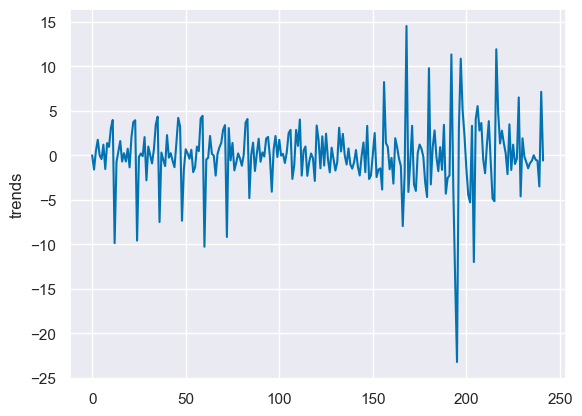

In [10]:
std_w['trends'] = std_w.sum(axis = 1)
sns.lineplot(std_w['trends'])

## Pillar 3 - LTP


<AxesSubplot:ylabel='land_pct'>

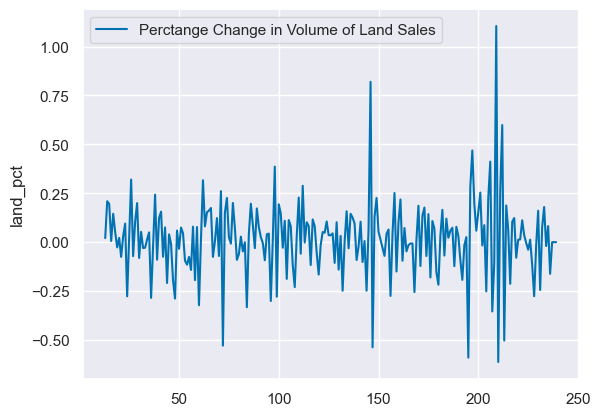

In [9]:
indicators = pd.read_excel('diss_data/more.xlsx')

# getting the long-term purchase variables from the indicator dataset
ltp = indicators[['period', 'land', 'car']]

# making them numeric because they are strings atm
ltp['car'] = pd.to_numeric(ltp['car'], errors = 'coerce')
ltp['land'] = pd.to_numeric(ltp['land'], errors = 'coerce')

# calculate percentage change
ltp['car_pct'] = ltp['car'].pct_change()
ltp['land_pct'] = ltp['land'].pct_change()

sns.lineplot(ltp['land_pct'], label = 'Perctange Change in Volume of Land Sales')

# Pillar 4

<AxesSubplot:ylabel='spread'>

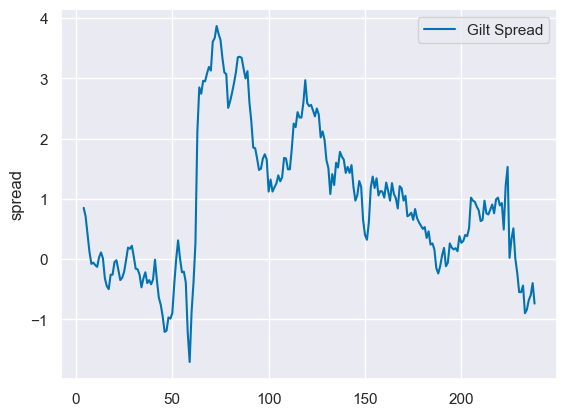

In [7]:
spread = indicators[['Y10', 'month2']]
spread['Y10'] = pd.to_numeric(spread['Y10'], errors= 'coerce')
spread['spread'] = spread['Y10'] - spread['month2']
spread['period'] = indicators['period']

sns.lineplot(spread['spread'], label = 'Gilt Spread')

# Pillar 5

<AxesSubplot:>

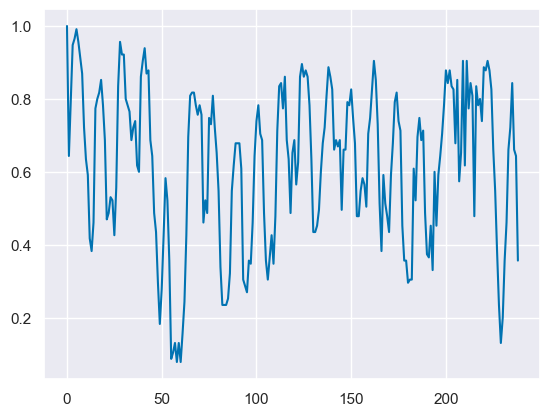

In [11]:
df_hp = pd.read_excel('diss_data/clean_hp.xlsx')
pdummy = df_hp.filter(regex = "Ip$")

pdummy.head()

diff_index = pdummy.mean(axis = 1)
diff_index.plot.line(x = df_hp['period'])

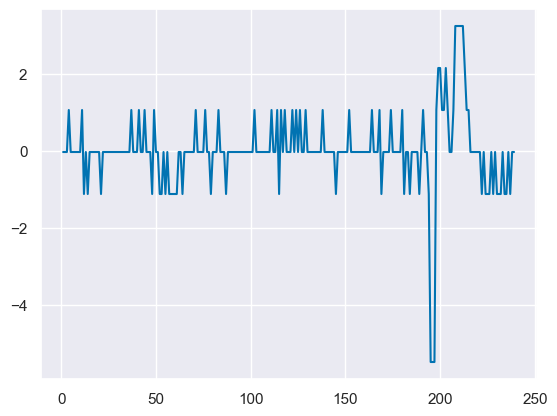

In [17]:
p5 = pd.DataFrame()
p5['vacancy'] = indicators[['all_vacancies']]
p5['vac_diff'] = p5['vacancy'].diff()
p5['period'] = indicators['period']

scaler = StandardScaler()
std_p5 = pd.DataFrame(scaler.fit_transform(p5[['vacancy','vac_diff']]), columns = [['vacancy','vac_diff']])

plt.plot(std_p5['vac_diff'])